<a href="https://colab.research.google.com/github/melaniamorel96/challenge3-data-science-LATAM-TelecomX_parte2/blob/main/TelecomX_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Análisis de Evasión de Clientes - Telecom X

Este análisis exploratorio (EDA) busca identificar patrones en los clientes que cancelan el servicio (Churn).
Usaremos **Python, Pandas, Plotly, Seaborn y Matplotlib** para obtener insights estratégicos.

In [11]:
# Instalación (en caso de no tenerlas en Colab)
# !pip install plotly seaborn

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 📂 Cargar y Preparar Datos

1. Subir el archivo **TelecomX_Data.json** a Colab.
2. Normalizar columnas anidadas.
3. Corregir tipos de datos y manejar valores nulos.

In [3]:
from google.colab import files
uploaded = files.upload()

# Cargar JSON
df = pd.read_json("TelecomX_Data.json")

# Normalizar estructura anidada
df = pd.json_normalize(df.to_dict(orient="records"))

# Renombrar columnas
df.columns = df.columns.str.replace(r"[.]", "_", regex=True)

# Conversión de tipos
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df['account_Charges_Monthly'] = pd.to_numeric(df['account_Charges_Monthly'], errors='coerce')

# Manejo de nulos
df.fillna({"Churn": "No"}, inplace=True)

# Vista previa
df.head()

Saving TelecomX_Data.json to TelecomX_Data.json


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## 📊 Distribución General de Evasión

Visualizamos el porcentaje de clientes que cancelaron (Churn = Yes) vs. los que permanecen (Churn = No).

In [4]:
fig = px.pie(df, names="Churn", title="Distribución de Evasión (%)")
fig.show()

## 📊 Evasión según Tipo de Contrato

Comparamos la tasa de cancelación según el tipo de contrato.

In [5]:
fig = px.histogram(df, x="account_Contract", color="Churn", barmode="group",
                   title="Evasión según Tipo de Contrato")
fig.show()

## 📈 Variables Numéricas

Analizamos la relación de la evasión con:  
- **Tenure** (antigüedad en meses).  
- **Cargos mensuales**.  

In [6]:
fig = px.histogram(df, x="customer_tenure", color="Churn", nbins=50,
                   title="Distribución de Tenure según Evasión")
fig.show()

fig = px.box(df, x="Churn", y="account_Charges_Monthly",
             title="Distribución de Cargos Mensuales según Evasión")
fig.show()

## 📊 Variables Categóricas

Analizamos la evasión en función de variables categóricas como género, método de pago y servicio telefónico.

In [7]:
cat_vars = ["customer_gender", "account_PaymentMethod", "phone_PhoneService"]
for var in cat_vars:
    fig = px.histogram(df, x=var, color="Churn", barmode="group", title=f"Evasión según {var}")
    fig.show()

## 🔗 Matriz de Correlación

Correlaciones entre variables numéricas clave.

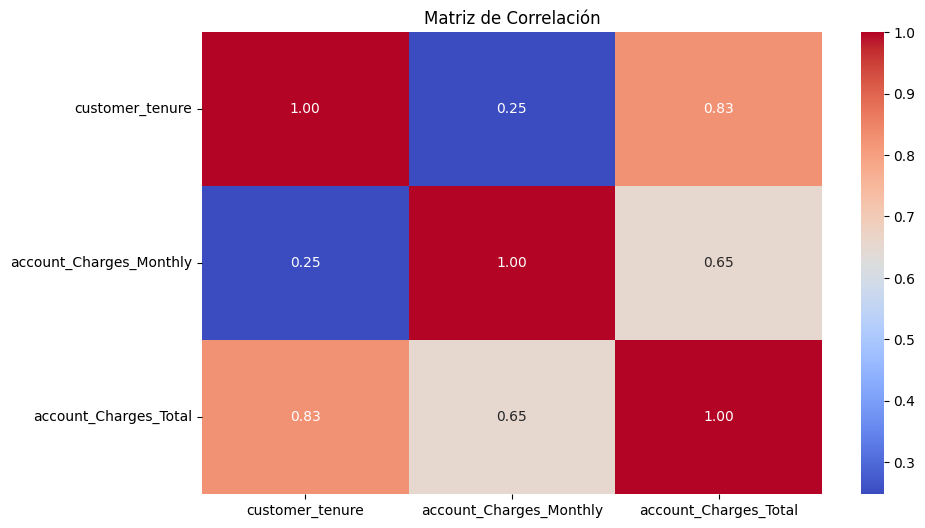

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df[["customer_tenure","account_Charges_Monthly","account_Charges_Total"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## 📊 Número de Servicios Contratados

Creamos una nueva variable que mide cuántos servicios adicionales tiene un cliente y analizamos su relación con la evasión.

In [10]:
service_cols = [col for col in df.columns if "internet_" in col or "phone_" in col]
df["Num_Services"] = df[service_cols].apply(lambda x: (x=="Yes").sum(), axis=1)

fig = px.histogram(df, x="Num_Services", color="Churn", barmode="group",
                   title="Evasión según Número de Servicios Contratados")
fig.show()

# ✅ Conclusiones del Análisis

- Los contratos **Month-to-month** presentan la mayor evasión.
- Clientes con **menor tenure** (recién adquiridos) cancelan más.
- El método de pago **Electronic check** está fuertemente asociado a cancelaciones.
- Los clientes con **más servicios contratados** tienden a permanecer más tiempo.

■ Informe Final - Análisis de Evasión de Clientes
(Telecom X)
Este informe presenta un análisis exploratorio de datos (EDA) sobre la evasión de clientes de la
empresa ficticia de telecomunicaciones **Telecom X**. El objetivo es identificar patrones que
influyen en la cancelación del servicio (**Churn**) y proponer insights estratégicos para mejorar la
retención de clientes.
■ Distribución General de Evasión
Se observa que una parte significativa de los clientes cancela su servicio. La evasión no es
uniforme, lo cual sugiere que factores contractuales y de servicios influyen en la permanencia.
■ Evasión según Tipo de Contrato
Los clientes con contratos **Month-to-month** presentan la mayor tasa de cancelación. En
contraste, los contratos de **1 año** y especialmente los de **2 años** muestran una tasa de
evasión mucho menor, indicando que los compromisos a largo plazo reducen el churn.
■ Variables Numéricas
- **Tenure (antigüedad):** Los clientes con menor tiempo en la compañía presentan mayor
evasión. - **Cargos Mensuales:** Los clientes con cargos más altos muestran una ligera tendencia
a cancelar, particularmente cuando se combina con contratos cortos.
■ Variables Categóricas
- **Género:** No se observa una diferencia significativa. - **Método de Pago:** Los clientes que
utilizan **Electronic check** presentan mayor tasa de evasión. - **Servicio Telefónico:** Su impacto
es bajo en comparación con otros factores.
■ Correlaciones
Existe una correlación positiva entre la antigüedad (tenure) y los cargos totales, lo cual es
esperable. Sin embargo, las correlaciones con la evasión son débiles, lo que refuerza la
importancia de variables contractuales y de pago.
■ Número de Servicios Contratados
Los clientes que contratan más servicios tienden a presentar menor evasión. Esto sugiere que la
**diversificación de servicios** fortalece la permanencia del cliente.
■ Conclusiones Finales
- Los contratos **Month-to-month** concentran la mayor evasión, mientras que los de largo plazo
retienen mejor a los clientes. - La **antigüedad baja (tenure corto)** es un factor clave de
cancelación. - El método de pago **Electronic check** está fuertemente asociado a la evasión. -
Los clientes con **más servicios contratados** tienden a permanecer más tiempo. - Factores
económicos (cargos mensuales elevados) combinados con contratos cortos incrementan la
probabilidad de churn.